In [1]:
import findspark
findspark.init()
findspark.find()

'D:\\Software Centre\\spark-3.1.2-bin-hadoop3.2'

In [2]:
####    Import statements   ####

import pandas as panda 
import numpy as num

## Data processing 
from itertools import chain
from pyspark.sql.functions import create_map, lit
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.linalg import DenseVector
from pyspark.sql import SQLContext

## Spark essentials 
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession

# PySpark ML Models
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

## Import for plot
import matplotlib.pyplot as plt
import seaborn as sns 

# Handle Warning 
import warnings
warnings.filterwarnings('ignore')

##INIT SPARK 
# sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
# spark = SparkSession.builder.getOrCreate()
# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("PysSpark ML Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
   
sc = spark.sparkContext

In [3]:
#Read dataset
#csv_data = panda.read_csv('BankChurners.csv')
spark_DF = spark.read.option('header','true').option('inferSchema','true').csv("BankChurners.csv")
spark_DF.first() # first with display first row or header row 

Row(CLIENTNUM=768805383, Attrition_Flag='Existing Customer', Customer_Age=45, Gender='M', Dependent_count=3, Education_Level='High School', Marital_Status='Married', Income_Category='$60K - $80K', Card_Category='Blue', Months_on_book=39, Total_Relationship_Count=5, Months_Inactive_12_mon=1, Contacts_Count_12_mon=3, Credit_Limit=12691.0, Total_Revolving_Bal=777, Avg_Open_To_Buy=11914.0, Total_Amt_Chng_Q4_Q1=1.335, Total_Trans_Amt=1144, Total_Trans_Ct=42, Total_Ct_Chng_Q4_Q1=1.625, Avg_Utilization_Ratio=0.061, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1=9.3448e-05, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2=0.99991)

In [4]:
rdd = sc.textFile('BankChurners.csv')
rdd.first() # first with display first row or header row 

'"CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"'

In [5]:
# display schema of data
spark_DF.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [6]:
#display attributes names
print(spark_DF.columns)

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [7]:
#count of records
print(spark_DF.count())

10127


In [8]:
#Describe the statistical information of data
spark_DF = spark_DF.withColumnRenamed("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","NB_1")
spark_DF = spark_DF.withColumnRenamed("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","NB_2")
spark_DF.describe().show()

+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+----------------------+---------------------+-----------------+-------------------+-----------------+--------------------+-----------------+-----------------+-------------------+---------------------+-------------------+-------------------+
|summary|          CLIENTNUM|   Attrition_Flag|     Customer_Age|Gender|   Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|    Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|     Credit_Limit|Total_Revolving_Bal|  Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|  Total_Trans_Amt|   Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|               NB_1|               NB_2|
+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+----

In [9]:
#check null values 
spark_DF.toPandas().isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_1                        0
NB_2                        0
dtype: int64

In [10]:
#check null values 
spark_DF.toPandas().isin([' ']).sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_1                        0
NB_2                        0
dtype: int64

In [11]:
# csv_data.describe().T
# csv_data['Attrition_Flag']
# csv_data.info()
for col in spark_DF.columns:
    spark_DF.describe(col).show()

+-------+-------------------+
|summary|          CLIENTNUM|
+-------+-------------------+
|  count|              10127|
|   mean|7.391776063336625E8|
| stddev|3.690378345023116E7|
|    min|          708082083|
|    max|          828343083|
+-------+-------------------+

+-------+-----------------+
|summary|   Attrition_Flag|
+-------+-----------------+
|  count|            10127|
|   mean|             null|
| stddev|             null|
|    min|Attrited Customer|
|    max|Existing Customer|
+-------+-----------------+

+-------+-----------------+
|summary|     Customer_Age|
+-------+-----------------+
|  count|            10127|
|   mean|46.32596030413745|
| stddev|8.016814032549046|
|    min|               26|
|    max|               73|
+-------+-----------------+

+-------+------+
|summary|Gender|
+-------+------+
|  count| 10127|
|   mean|  null|
| stddev|  null|
|    min|     F|
|    max|     M|
+-------+------+

+-------+------------------+
|summary|   Dependent_count|
+-------+--

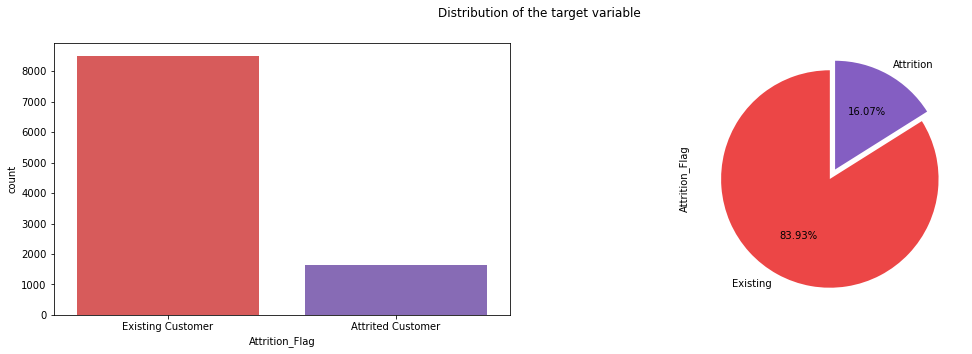

In [12]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=spark_DF.toPandas()['Attrition_Flag'], palette=['#ec4646','#845ec2'])
plt.subplot(1,2,2)
spark_DF.toPandas()['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1], 
                                       startangle=90, colors=['#ec4646','#845ec2'],
                                      labels = ['Existing','Attrition'])
plt.suptitle('Distribution of the target variable')
plt.show()

In [13]:
#### Removing duplicate records from input
print(spark_DF.count())
no_duplicates = spark_DF.dropDuplicates()
print(no_duplicates.count())

10127
10127


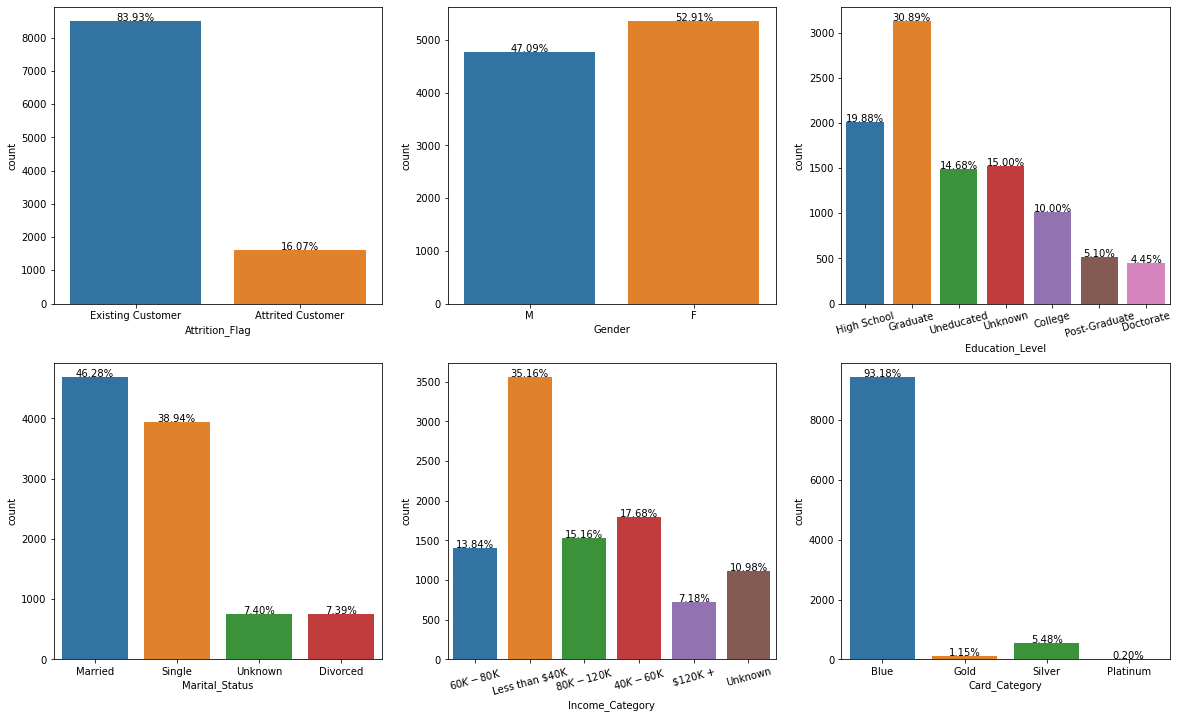

In [14]:
# spark_DF.groupBy("Income_Category").count().show()
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplot(cats):
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  
    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            ax = sns.countplot(cats[index], data=spark_DF.toPandas(), ax=axis[i][j])
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(spark_DF.toPandas())*100),
                        ha="center") 
            index += 1
pltCountplot(cats)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


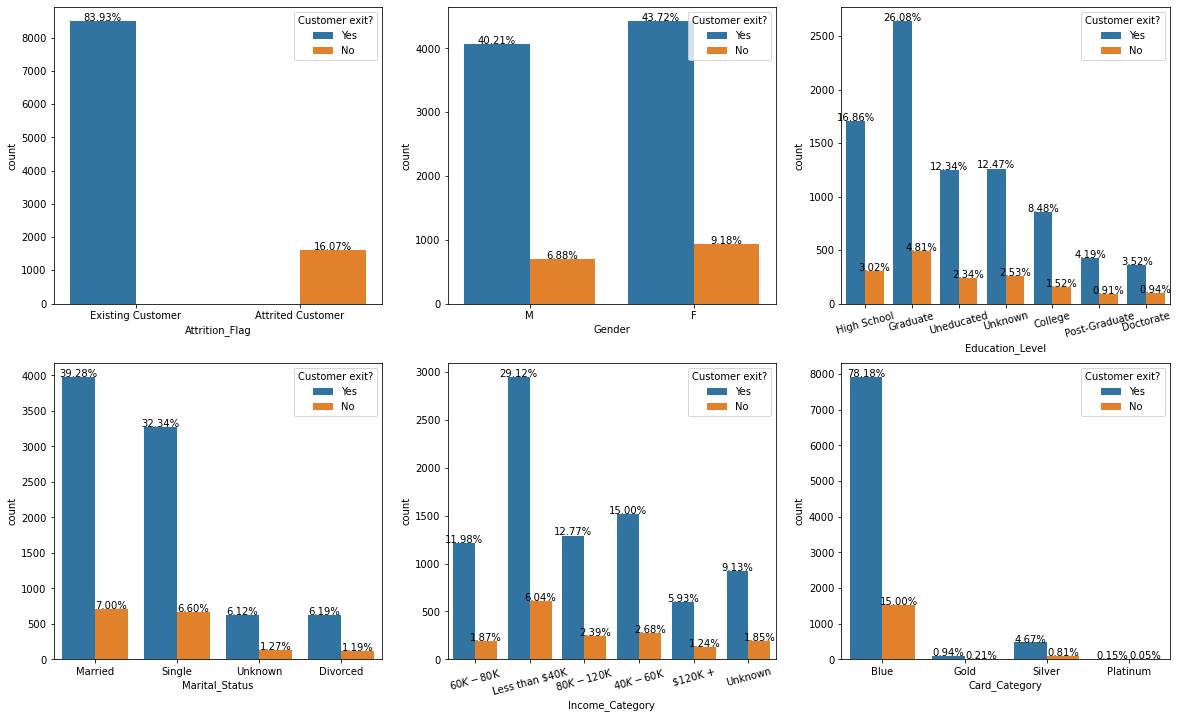

In [15]:
fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

index = 0
target='Attrition_Flag'
for i in range(len(cats) // 3):
    for j in range(3):
        ax = sns.countplot(cats[index], data=spark_DF.toPandas(), hue=target, ax=axis[i][j])
        ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
        if cats[index] in ['Education_Level', 'Income_Category']:
            for item in ax.get_xticklabels():
                item.set_rotation(15)
                
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(spark_DF.toPandas())*100),
                        ha="center") 
        index += 1

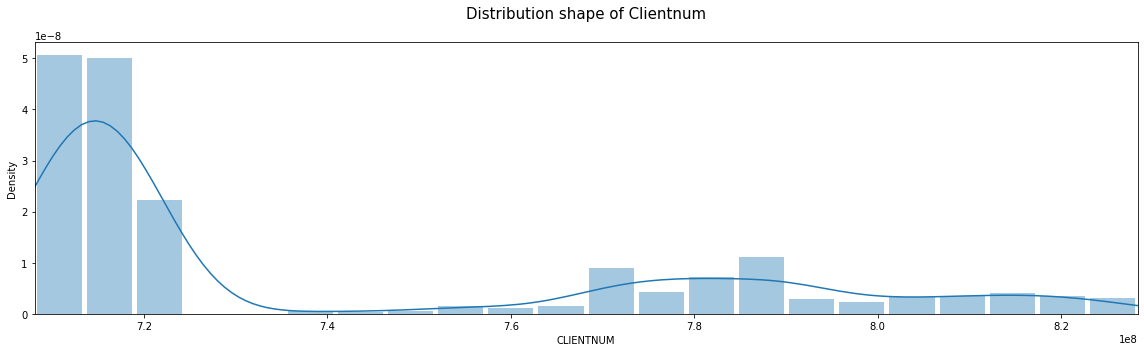

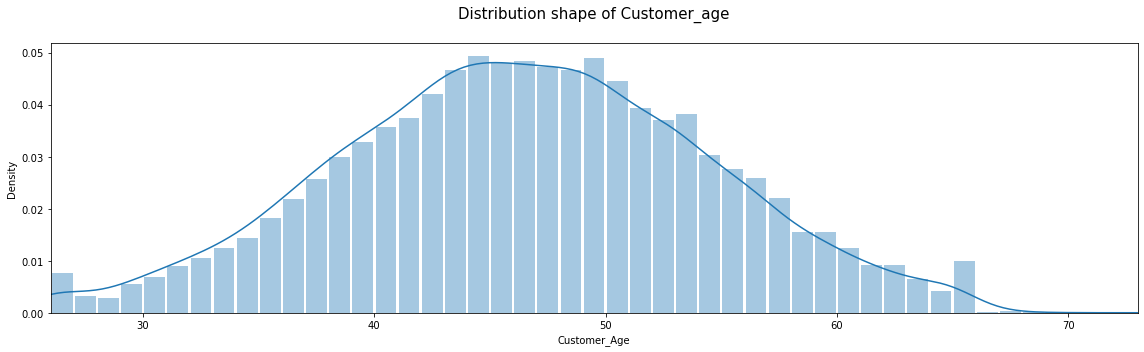

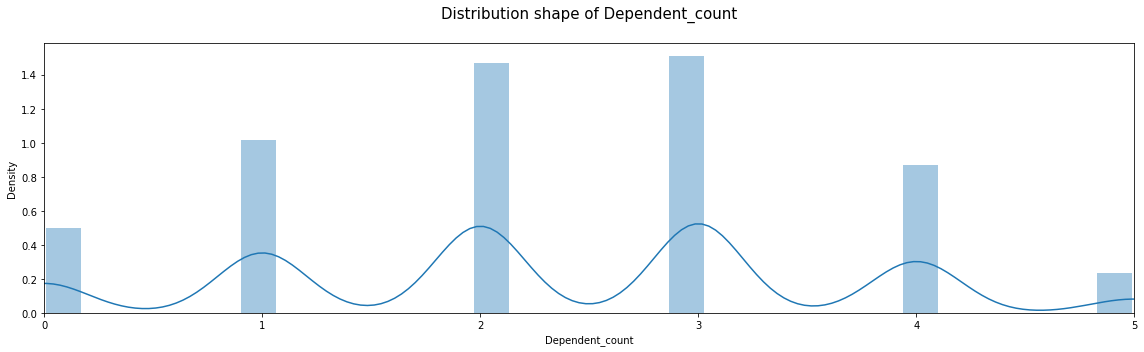

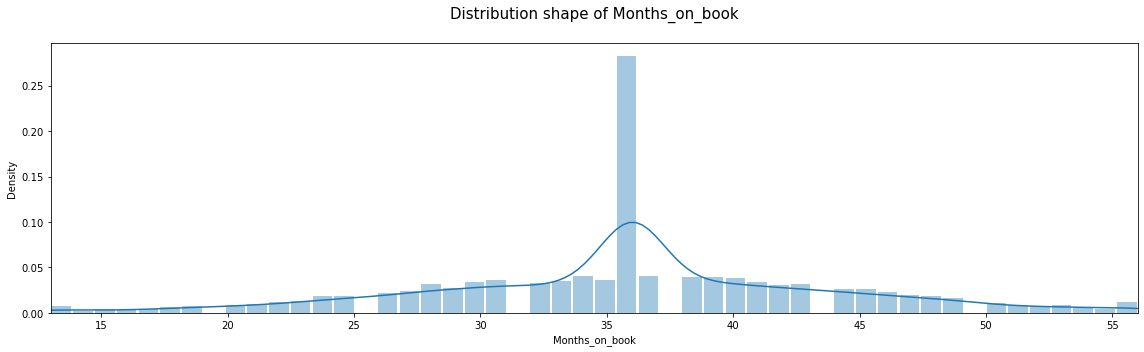

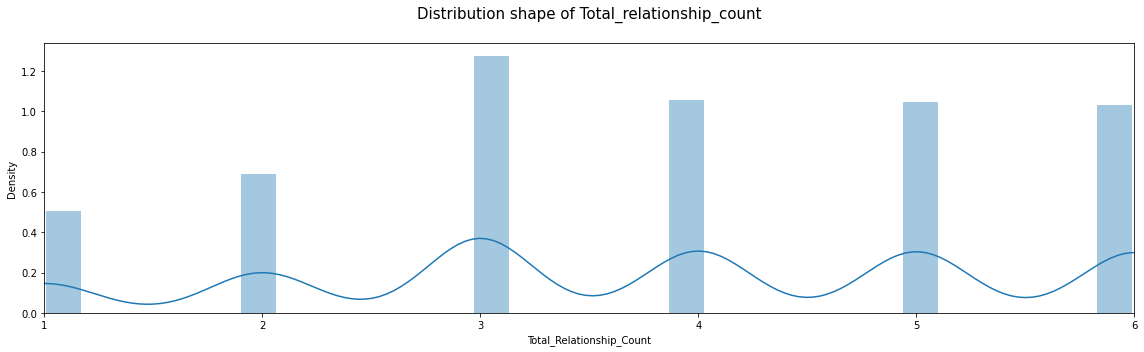

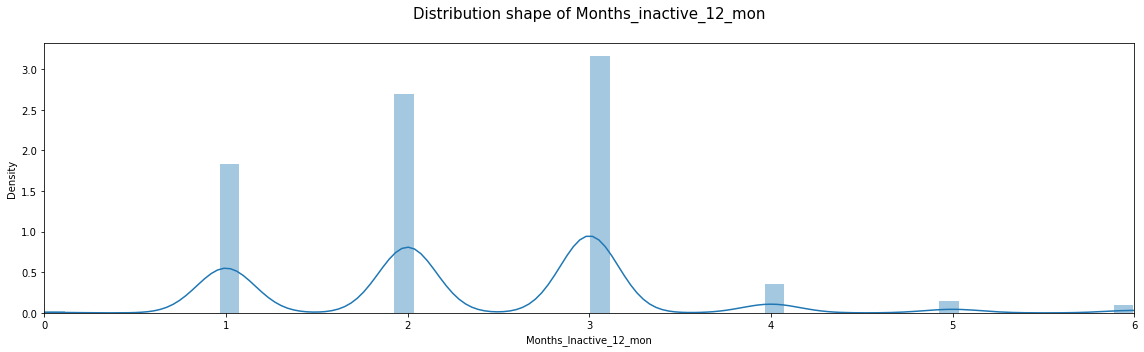

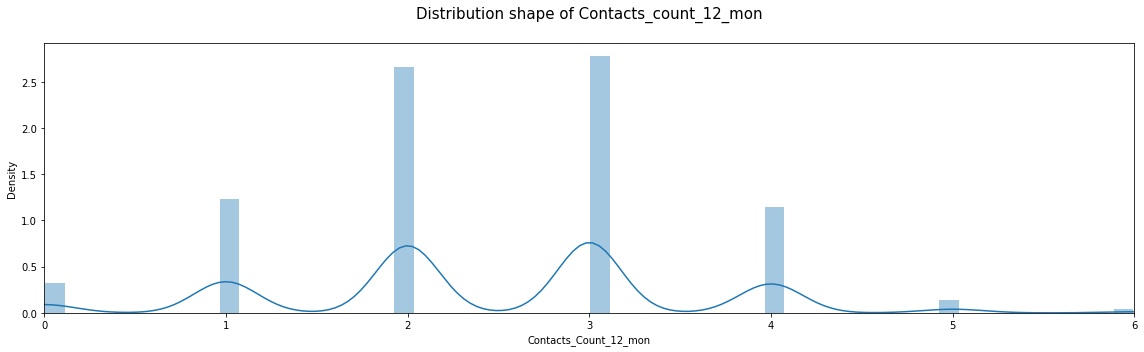

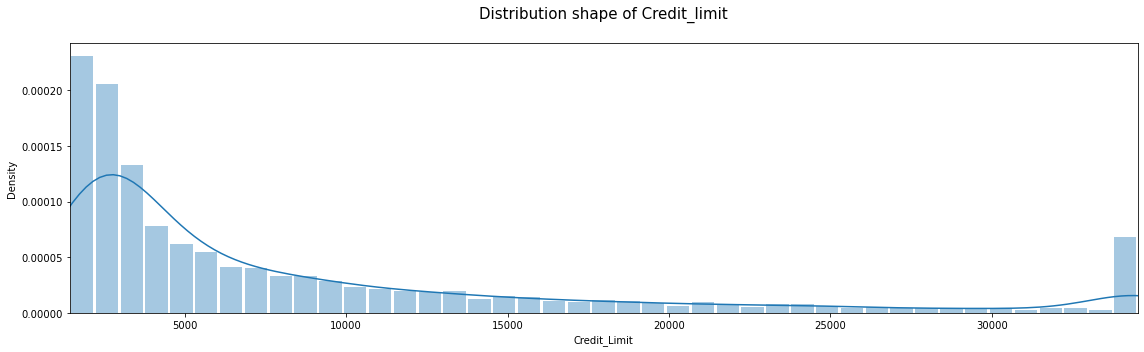

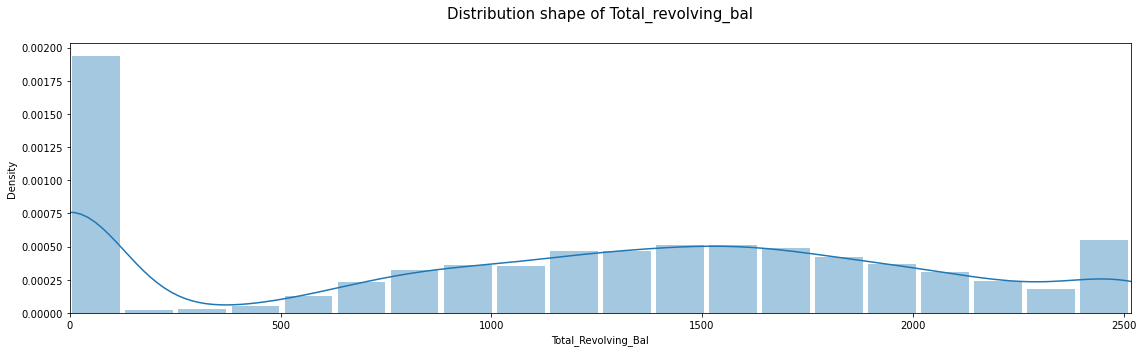

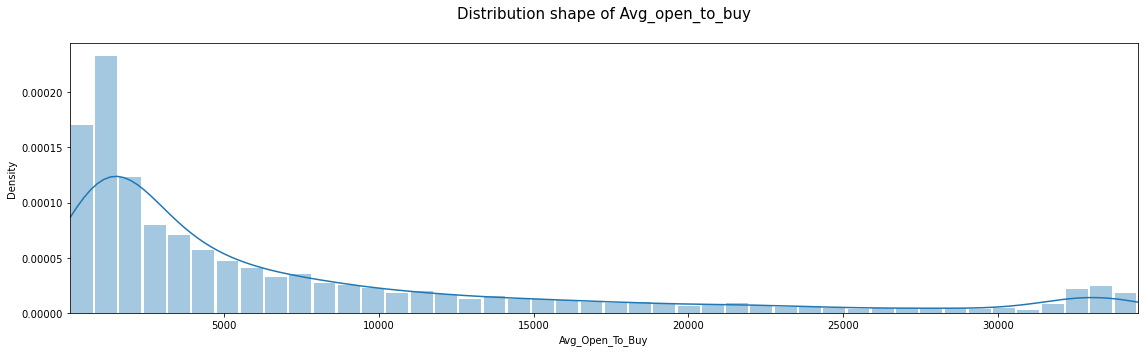

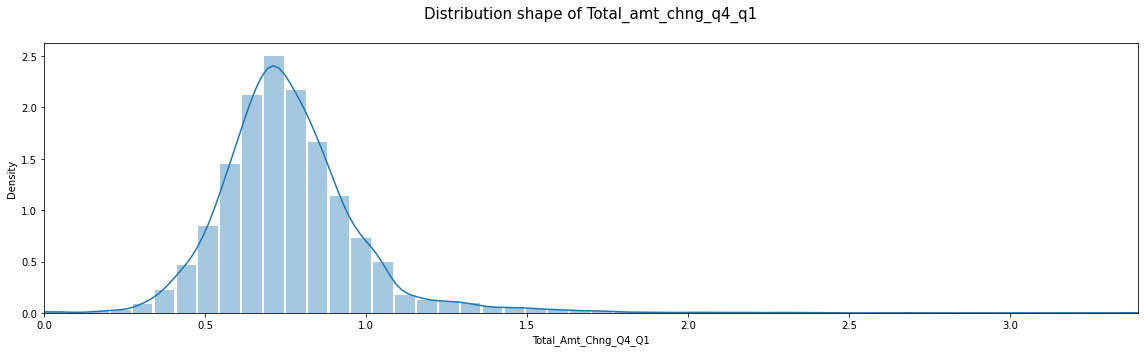

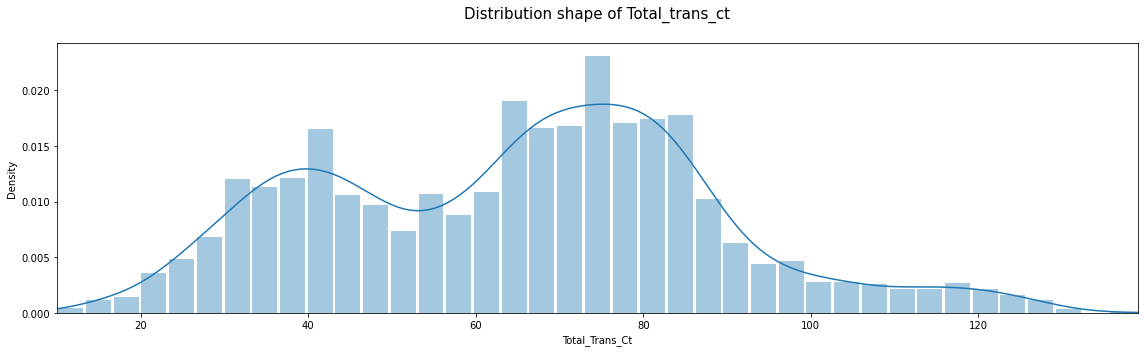

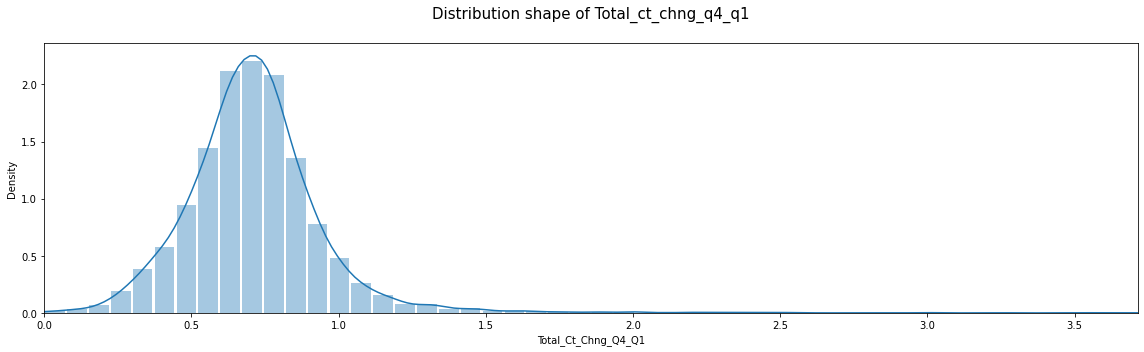

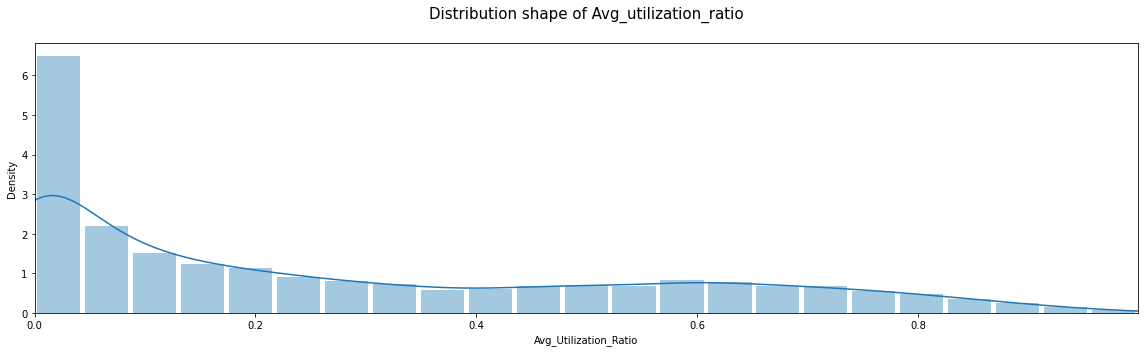

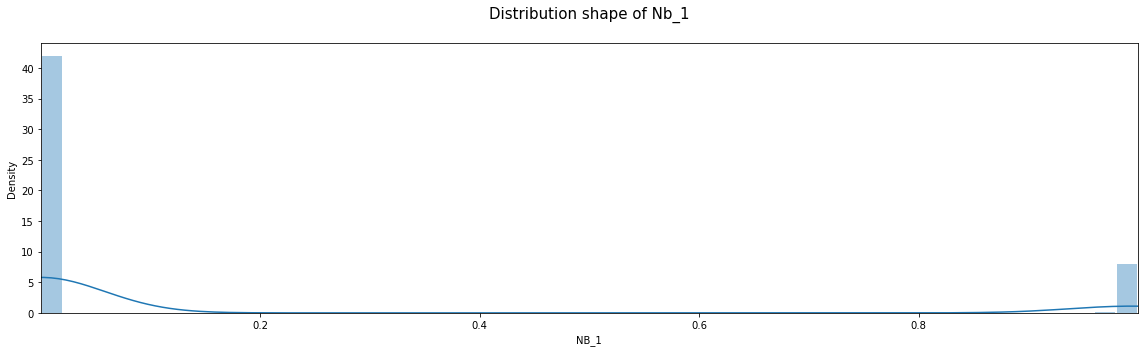

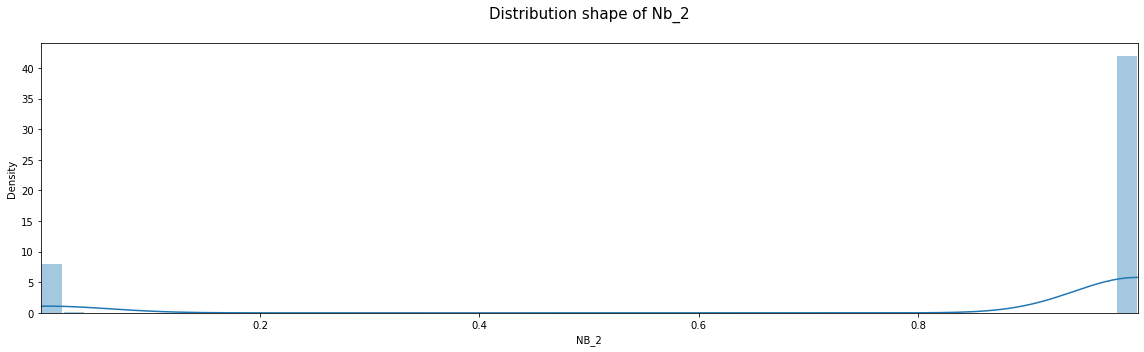

In [16]:
#Distribution and skewness of each feature
for feature in no_duplicates.toPandas().select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(no_duplicates.toPandas()[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(no_duplicates.toPandas()[feature].min(), no_duplicates.toPandas()[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [17]:
#Convert categorical target vaariable to numerical 
target_dict = {'Existing Customer':1, 'Attrited Customer':0}
mapping_target = create_map([lit(x) for x in chain(*target_dict.items())])
no_duplicates = no_duplicates.withColumn('Attrition_Flag_map', mapping_target[no_duplicates['Attrition_Flag']])
columns_to_drop = ['Attrition_Flag']
no_duplicates = no_duplicates.drop(*columns_to_drop)

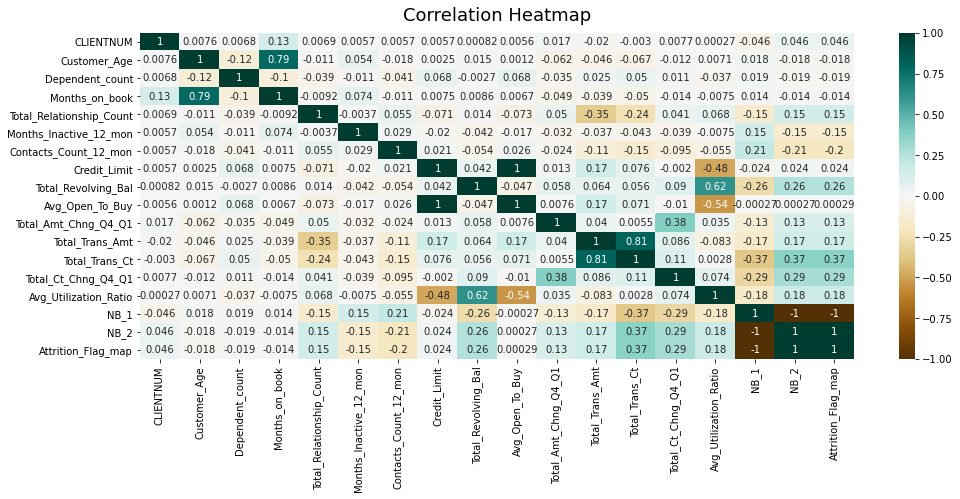

In [18]:
#Correlation heat map to check the correlation of each numerical variable 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(no_duplicates.toPandas().corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [19]:
#Dropping Unwanted attributes 
columns_to_drop = ['NB_1',
                   'NB_2',
                   'CLIENTNUM']
no_duplicates = no_duplicates.drop(*columns_to_drop)

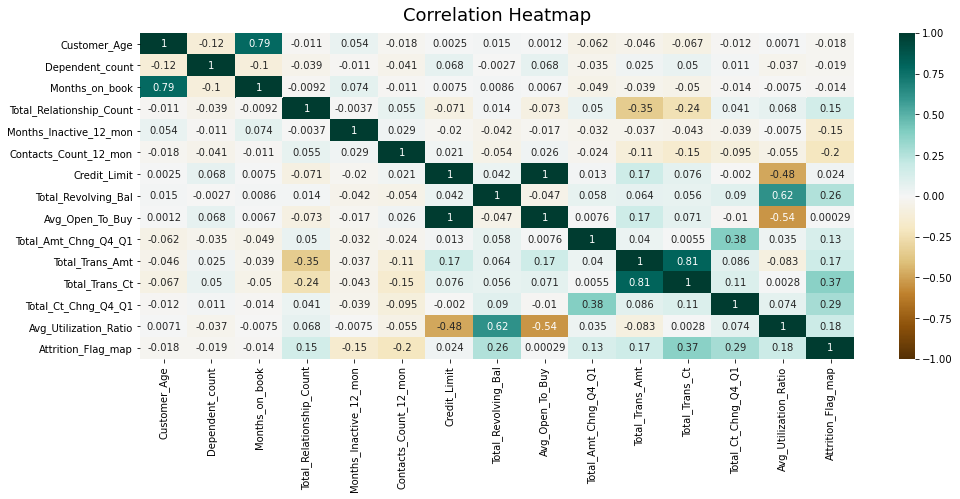

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(no_duplicates.toPandas().corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [21]:
import plotly.express as ex
# plotting Marital status 
ex.pie(no_duplicates.toPandas(),names='Marital_Status',title='Propotion Of Different Marriage Statuses',hole=0.33)

In [22]:
# PLoting Educational level 
ex.pie(no_duplicates.toPandas(),names='Education_Level',title='Propotion Of Education Levels',hole=0.33)

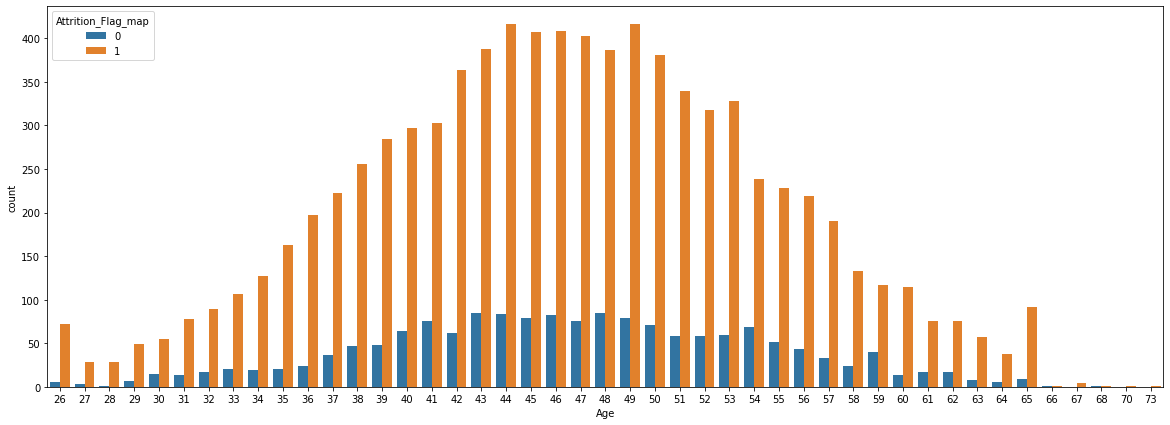

In [23]:
#Distribution of customer age 
plt.figure(figsize=[20,7])
sns.countplot(x='Customer_Age', hue='Attrition_Flag_map', data=no_duplicates.toPandas());
plt.xlabel('Age');

In [24]:
#### Converting categorical data into numerical values
income_dict = {'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
card_dict = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
mapping_income = create_map([lit(x) for x in chain(*income_dict.items())])
mapping_card = create_map([lit(x) for x in chain(*card_dict.items())])
no_duplicates = no_duplicates.withColumn('Income_Category_map', mapping_income[no_duplicates['Income_Category']])
no_duplicates = no_duplicates.withColumn('Card_Category_map', mapping_card[no_duplicates['Card_Category']])
columns_to_drop = ['Income_Category', 'Attrition_Flag', 'Card_Category']
# df = df.drop(*columns_to_drop)

In [25]:
no_duplicates = no_duplicates.drop(*columns_to_drop)
def accuracy_m(model,target): 
    predictions = model.transform(test_data)
    cm = predictions.select(target, "prediction")
    acc = cm.filter(cm.Attrition_Flag_map == cm.prediction).count() / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100)) 

In [26]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
no_duplicates.printSchema()
no_duplicates.select("Income_Category_map", "Attrition_Flag_map","Card_Category_map").show()
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status']
stages = [] # stages in our Pipeline
for categoricalCol in categorical_columns:
    #Passing the values to StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # StringIndexer result fed to the OneHotEncoder
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],
                                     outputCols=[categoricalCol + "Map"])
    stages += [stringIndexer, encoder]


root
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Attrition_Flag_map: integer (nullable = true)
 |-- Income_Category_map: integer (nullable = true)
 |-- Card_Category_map: integer (nullable = true)

+---------

In [27]:
#creating list o numerical columns for input
numerical_columns = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                     'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                     'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                     'Avg_Utilization_Ratio', 'Income_Category_map', 'Card_Category_map']
#setting the list of columns for assembler input
assemblerInputs = numerical_columns+[c + "Map" for c in categorical_columns]
# for c in assemblerInputs:
#     print(c)
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [28]:
#Scale the input
from pyspark.ml.feature import StandardScaler
# Normalize each feature to have unit standard deviation.
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures") 
stages += [scaler]

In [29]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(no_duplicates)
spark_dataset = pipelineModel.transform(no_duplicates)

In [30]:
spark_dataset.select(["scaledFeatures","Attrition_Flag_map"]).show(5, truncate=True)

+--------------------+------------------+
|      scaledFeatures|Attrition_Flag_map|
+--------------------+------------------+
|[3.07950903801317...|                 1|
|[1.53975451900658...|                 1|
|[3.07950903801317...|                 1|
|[2.30963177850988...|                 1|
|[0.76987725950329...|                 1|
+--------------------+------------------+
only showing top 5 rows



In [31]:
# Split the data into train and test sets
train_data, test_data = spark_dataset.randomSplit([.8,.2],seed=54)
train_data.groupby('Attrition_Flag_map').agg({'Attrition_Flag_map': 'count'}).show()
print(train_data.count())
print(test_data.count())

+------------------+-------------------------+
|Attrition_Flag_map|count(Attrition_Flag_map)|
+------------------+-------------------------+
|                 1|                     6765|
|                 0|                     1285|
+------------------+-------------------------+

8050
2077


In [32]:
# Logistical Regression Model

# Initialize `lr_model`
lr_model = LogisticRegression(labelCol="Attrition_Flag_map",
                        featuresCol="scaledFeatures",
                        maxIter=10,
                        regParam=0.3)

# Fit the data to the model
linearModel = lr_model.fit(train_data)

# Make predictions on test data using the transform() method.
lr_predictions = linearModel.transform(test_data)

In [33]:
cm = lr_predictions.select("Attrition_Flag_map", "prediction")	
cm.groupby('Attrition_Flag_map').agg({'Attrition_Flag_map': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()
accuracy_m(linearModel,"Attrition_Flag_map")
selected = lr_predictions.select("Attrition_Flag_map", "prediction", "probability")
selected.show(10)

+------------------+-------------------------+
|Attrition_Flag_map|count(Attrition_Flag_map)|
+------------------+-------------------------+
|                 1|                     1735|
|                 0|                      342|
+------------------+-------------------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|                3|
|       1.0|             2074|
+----------+-----------------+

Model accuracy: 83.678%
+------------------+----------+--------------------+
|Attrition_Flag_map|prediction|         probability|
+------------------+----------+--------------------+
|                 1|       1.0|[0.15110420795111...|
|                 0|       1.0|[0.12410230036306...|
|                 1|       1.0|[0.21258200833630...|
|                 0|       1.0|[0.18905442799879...|
|                 1|       1.0|[0.11835930682470...|
|                 1|       1.0|[0.06134754993423...|
|                 0|       1.

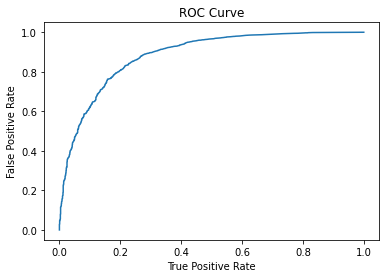

Training set area under ROC curve: 0.8839825032137834
Model accuracy: 83.678%


In [34]:
trainingSummary = linearModel.summary
roc = trainingSummary.roc.toPandas()
area_roc_lr = trainingSummary.areaUnderROC
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set area under ROC curve: ' + str(trainingSummary.areaUnderROC))
accuracy_m(linearModel,"Attrition_Flag_map")

In [35]:
# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="Attrition_Flag_map", featuresCol="scaledFeatures")
# Train model with train_data
rf_Model = rf.fit(train_data)

# Make predictions with test_data.
rf_predictions = rf_Model.transform(test_data)

In [36]:
cm = rf_predictions.select("Attrition_Flag_map", "prediction")	
cm.groupby('Attrition_Flag_map').agg({'Attrition_Flag_map': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()
accuracy_m(linearModel,"Attrition_Flag_map")
selected = rf_predictions.select("Attrition_Flag_map", "prediction", "probability")
selected.show(20)

+------------------+-------------------------+
|Attrition_Flag_map|count(Attrition_Flag_map)|
+------------------+-------------------------+
|                 1|                     1735|
|                 0|                      342|
+------------------+-------------------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|              200|
|       1.0|             1877|
+----------+-----------------+

Model accuracy: 83.678%
+------------------+----------+--------------------+
|Attrition_Flag_map|prediction|         probability|
+------------------+----------+--------------------+
|                 1|       1.0|[0.06075565874360...|
|                 0|       1.0|[0.13426610114702...|
|                 1|       1.0|[0.13137614694362...|
|                 0|       0.0|[0.53293947122359...|
|                 1|       1.0|[0.10677319597816...|
|                 1|       1.0|[0.03897201128192...|
|                 0|       0.

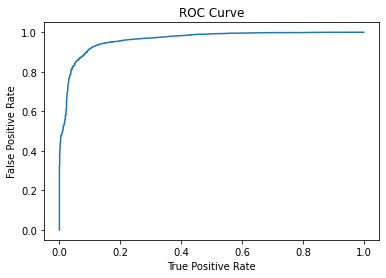

Training set area under ROC curve: 0.962628544148901
Model accuracy: 83.678%


In [37]:
trainingSummary = rf_Model.summary
roc = trainingSummary.roc.toPandas()
area_roc_lr = trainingSummary.areaUnderROC
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set area under ROC curve: ' + str(trainingSummary.areaUnderROC))
accuracy_m(linearModel,"Attrition_Flag_map")